In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

# Task – 1

In [32]:
df=pd.read_csv("DS3_C1_S2_Weather_Data_Practice.csv",parse_dates=['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [33]:
df = df.set_index('Date')
weather.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [34]:
lags = 100

moving_avg = df.rolling(window=lags).mean()

df_ts = pd.DataFrame({'Actual':df['Temp'], 'MA':moving_avg['Temp']})
df_ts

,Actual,MA
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN
...,...,...
1990-12-27,14.0,12.416
1990-12-28,13.6,12.436
1990-12-29,13.5,12.408


In [35]:
df_ts.isnull().sum()

Actual     0
MA        99
dtype: int64

In [36]:
df_ts.head(lags)

,Actual,MA
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN
...,...,...
1981-04-06,16.6,NaN
1981-04-07,10.0,NaN
1981-04-08,14.9,NaN


In [37]:
df_ts.Actual.head(lags).mean()

16.191999999999997

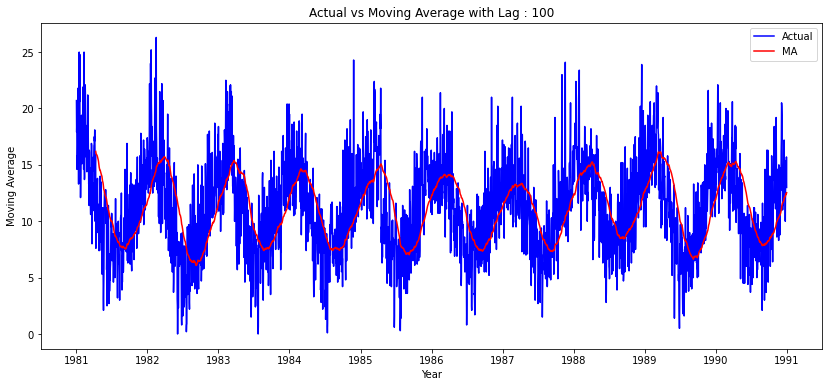

In [38]:
plt.figure(figsize=(14,6))
plt.plot(df_ts.Actual, color='blue', label='Actual')
plt.plot(df_ts.MA,  color='red', label='MA')
plt.title('Actual vs Moving Average with Lag : ' +str(lags))
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

# Task – 2

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

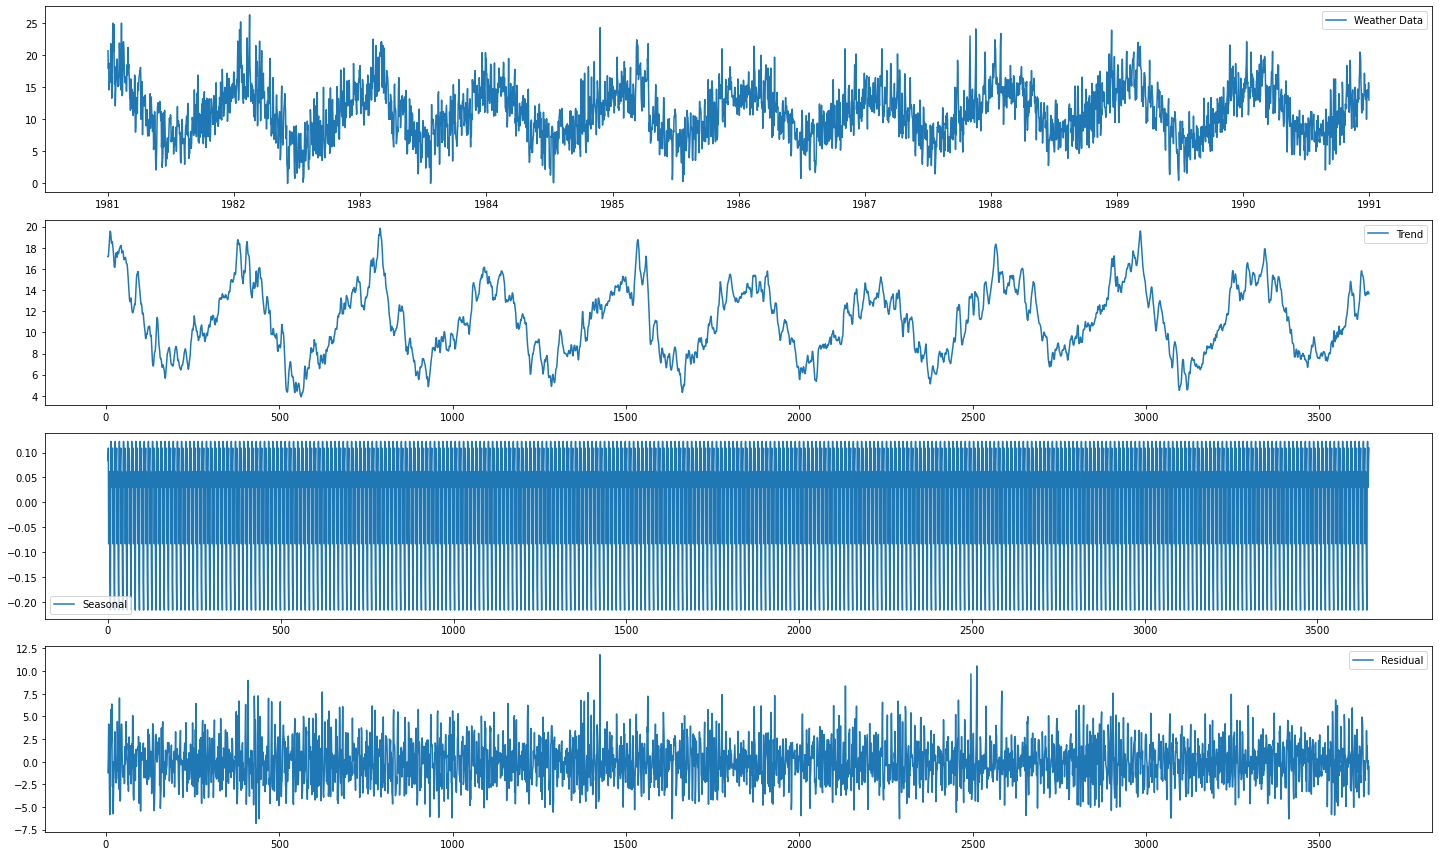

In [41]:
decomposition = seasonal_decompose(np.asarray(df), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df,label='Weather Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

# Task 3

In [43]:
# Simple Exponent - when there is no trend/seasonality
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [44]:
data = df['Temp']
data

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [45]:
type(data)

pandas.core.series.Series

In [46]:
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

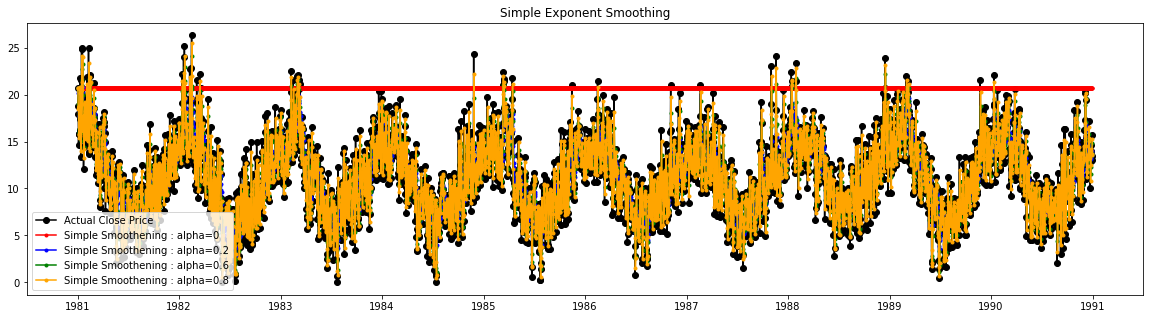

In [47]:
colors = ['red','blue','green','orange']

# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20, 5))
plt.plot(data, marker='o', color='black',label='Actual Close Price')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

# Task 4

In [48]:
model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

Date
1981-01-01    16.180457
1981-01-02    17.000627
1981-01-03    17.186700
1981-01-04    17.676889
1981-01-05    16.921351
                ...    
1990-12-27    13.729330
1990-12-28    13.645129
1990-12-29    13.493255
1990-12-30    13.352431
1990-12-31    13.914528
Length: 3650, dtype: float64


Text(0.5, 1.0, 'Double Exponent Smoothing')

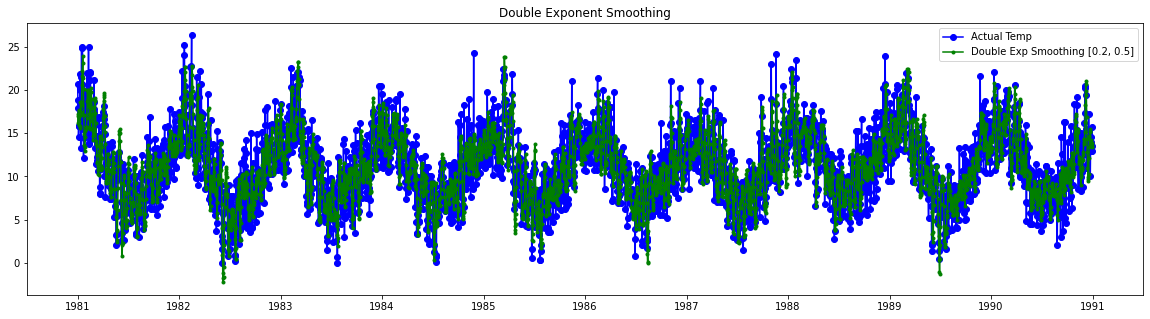

In [49]:
fig,ax = plt.subplots(1,1,figsize=(20, 5))
plt.plot(data,marker='o',color='blue',label='Actual Temp')
plt.plot(f_dexp, marker='.',color='green',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In [50]:
# Triple Smoothing
path="DS3_C1_S2_Weather_Data_Practice.csv"
df_1 = pd.read_csv(path,index_col='Date',parse_dates=True)

# build model
model = ExponentialSmoothing(df_1.values,trend='add',seasonal='add',seasonal_periods=12).fit()

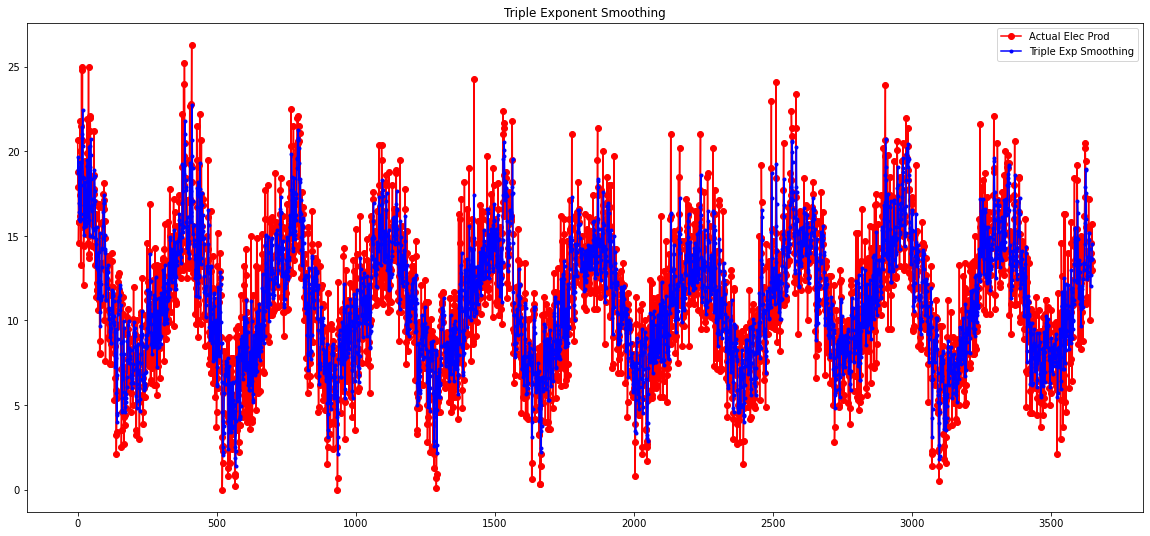

In [51]:
fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.plot(df_1.values, marker='o',color='red',label='Actual Elec Prod')
plt.title('Triple Exponent Smoothing')
plt.plot(model.fittedvalues,marker='.',color='blue',label='Triple Exp Smoothing')
plt.legend()
plt.show()

In [52]:
# ADF test 
def checkStationarity(data):
    pvalue = adfuller(data['actual'])[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [53]:
mystock = df[['actual']]
mystock.head()

,actual
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [54]:
# function call
print(checkStationarity(mystock))

pvalue=0.00024708263003611787. Data is Stationary. Proceed to model building


In [55]:
# difference the data by 1 (default)
diff_mystock = mystock - mystock.shift()
print(diff_mystock)

            actual
Date              
1981-01-01     NaN
1981-01-02    -2.8
1981-01-03     0.9
1981-01-04    -4.2
1981-01-05     1.2
...            ...
1990-12-27    -0.6
1990-12-28    -0.4
1990-12-29    -0.1
1990-12-30     2.2
1990-12-31    -2.7

[3650 rows x 1 columns]


In [56]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(diff_mystock))
diff_mystock.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_mystock))
print(diff_mystock)

Before removing Nulls,total records =  3650
After removing Nulls, total records =  3649
            actual
Date              
1981-01-02    -2.8
1981-01-03     0.9
1981-01-04    -4.2
1981-01-05     1.2
1981-01-06     0.0
...            ...
1990-12-27    -0.6
1990-12-28    -0.4
1990-12-29    -0.1
1990-12-30     2.2
1990-12-31    -2.7

[3649 rows x 1 columns]


In [57]:
checkStationarity(diff_mystock)

'pvalue=2.681561822675177e-30. Data is Stationary. Proceed to model building'

Text(0.5, 1.0, 'Actual vs Differenced data')

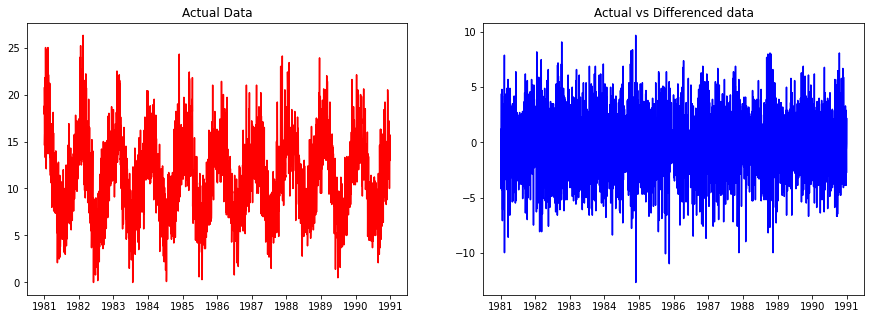

In [58]:
fig,ax = plt.subplots(1,1,figsize=(15, 5))

plt.subplot(121)
plt.plot(mystock,color='red')
plt.title('Actual Data')

plt.subplot(122)
plt.plot(diff_mystock,color='blue')
plt.title('Differenced Data')

plt.title("Actual vs Differenced data")